In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [3]:
#pip install scikit-learn --upgrade

     |████████████████████████████████| 7.2 MB 1.8 MB/s eta 0:00:01     |█                               | 204 kB 1.5 MB/s eta 0:00:05
ERROR: bamboolib 1.10.0 has requirement pandas<1.0.0,>=0.18.0, but you'll have pandas 1.0.3 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.0
    Uninstalling scikit-learn-0.23.0:
      Successfully uninstalled scikit-learn-0.23.0
Note: you may need to restart the kernel to use updated packages.


In [7]:

#pip freeze


In [2]:
df1= pd.read_excel("/Users/gowtham/Downloads/OBDdatasets-master/masterDegreeResearch/dailyRoutes.xlsx")

In [3]:
df1.shape

(47514, 33)

In [4]:
df1.head()

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1502902504267,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0
1,1502902512283,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
2,1502902520291,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.573,0.01,13.0,16.0,2.0,8.0,2017.0
3,1502902528300,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.565,0.01,13.0,16.0,2.0,8.0,2017.0
4,1502902536320,chevrolet,agile,2011.0,1.4,n,car1,100.0,80.0,0.486,...,0.251,MIL is OFF0 codes,NaN,0.569,0.01,13.0,16.0,2.0,8.0,2017.0


In [5]:
df1.isnull().sum()

TIMESTAMP                          0
MARK                              55
MODEL                             55
CAR_YEAR                          55
ENGINE_POWER                      55
AUTOMATIC                         55
VEHICLE_ID                         0
BAROMETRIC_PRESSURE(KPA)       37302
ENGINE_COOLANT_TEMP            13550
FUEL_LEVEL                     44520
ENGINE_LOAD                    16542
AMBIENT_AIR_TEMP               43895
ENGINE_RPM                     13655
INTAKE_MANIFOLD_PRESSURE       22425
MAF                            35686
LONG TERM FUEL TRIM BANK 2     34444
FUEL_TYPE                      27509
AIR_INTAKE_TEMP                13162
FUEL_PRESSURE                  47376
SPEED                            985
SHORT TERM FUEL TRIM BANK 2    34444
SHORT TERM FUEL TRIM BANK 1     9919
ENGINE_RUNTIME                 35612
THROTTLE_POS                   13655
DTC_NUMBER                       372
TROUBLE_CODES                  35589
TIMING_ADVANCE                 13352
E

In [6]:
df1.drop(df1.columns.difference(['ENGINE_POWER','BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','FUEL_PRESSURE','FUEL_TYPE', 'ENGINE_LOAD','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','SPEED','THROTTLE_POS','LONG TERM FUEL TRIM BANK 2']), 1, inplace=True)

In [7]:
df1.head()

,ENGINE_POWER,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,FUEL_PRESSURE,SPEED,THROTTLE_POS
0,1.4,100.0,80.0,0.486,0.333,1009.0,49.0,4.49,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
1,1.4,100.0,80.0,0.486,0.325,1003.0,52.0,4.51,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
2,1.4,100.0,80.0,0.486,0.329,995.0,51.0,4.48,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
3,1.4,100.0,80.0,0.486,0.325,1004.0,51.0,4.51,NaN,Biodiesel_Ethanol,NaN,0.0,0.251
4,1.4,100.0,80.0,0.486,0.329,1005.0,49.0,4.49,NaN,Biodiesel_Ethanol,NaN,0.0,0.251


In [8]:
df1.columns

Index(['ENGINE_POWER', 'BAROMETRIC_PRESSURE(KPA)', 'ENGINE_COOLANT_TEMP',
       'FUEL_LEVEL', 'ENGINE_LOAD', 'ENGINE_RPM', 'INTAKE_MANIFOLD_PRESSURE',
       'MAF', 'LONG TERM FUEL TRIM BANK 2', 'FUEL_TYPE', 'FUEL_PRESSURE',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [9]:
df1.isnull().sum()

ENGINE_POWER                     55
BAROMETRIC_PRESSURE(KPA)      37302
ENGINE_COOLANT_TEMP           13550
FUEL_LEVEL                    44520
ENGINE_LOAD                   16542
ENGINE_RPM                    13655
INTAKE_MANIFOLD_PRESSURE      22425
MAF                           35686
LONG TERM FUEL TRIM BANK 2    34444
FUEL_TYPE                     27509
FUEL_PRESSURE                 47376
SPEED                           985
THROTTLE_POS                  13655
dtype: int64

In [10]:
# function for the percentage of the null values
def assess_NA(data):
  
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [11]:
assess_NA(df1)

,Number of NA,Percent NA
FUEL_PRESSURE,47376,99.71
FUEL_LEVEL,44520,93.70
BAROMETRIC_PRESSURE(KPA),37302,78.51
MAF,35686,75.11
LONG TERM FUEL TRIM BANK 2,34444,72.49
FUEL_TYPE,27509,57.90
INTAKE_MANIFOLD_PRESSURE,22425,47.20
ENGINE_LOAD,16542,34.82
THROTTLE_POS,13655,28.74
ENGINE_RPM,13655,28.74


In [12]:
df1.FUEL_TYPE.value_counts()

Biodiesel_Ethanol     19867
Biodiesel_Gasoline      138
Name: FUEL_TYPE, dtype: int64

In [13]:
df1.dtypes

ENGINE_POWER                  float64
BAROMETRIC_PRESSURE(KPA)      float64
ENGINE_COOLANT_TEMP           float64
FUEL_LEVEL                    float64
ENGINE_LOAD                   float64
ENGINE_RPM                    float64
INTAKE_MANIFOLD_PRESSURE      float64
MAF                           float64
LONG TERM FUEL TRIM BANK 2    float64
FUEL_TYPE                      object
FUEL_PRESSURE                 float64
SPEED                         float64
THROTTLE_POS                  float64
dtype: object

In [14]:
df1.drop(['FUEL_LEVEL','INTAKE_MANIFOLD_PRESSURE','MAF','FUEL_TYPE','LONG TERM FUEL TRIM BANK 2','FUEL_PRESSURE','BAROMETRIC_PRESSURE(KPA)'], axis=1, inplace=True)

In [15]:
df1.shape

(47514, 6)

In [16]:
df1.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [17]:
df1.shape

(47514, 6)

In [18]:
df1.isnull().sum()

ENGINE_POWER              55
ENGINE_COOLANT_TEMP    13550
ENGINE_LOAD            16542
ENGINE_RPM             13655
SPEED                    985
THROTTLE_POS           13655
dtype: int64

In [19]:
#threshold to drop which has 6 null values
df2=df1.dropna(thresh=6)

In [20]:
df2.shape

(29157, 6)

In [21]:
df2.isnull().sum()

ENGINE_POWER           0
ENGINE_COOLANT_TEMP    0
ENGINE_LOAD            0
ENGINE_RPM             0
SPEED                  0
THROTTLE_POS           0
dtype: int64

In [22]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [23]:
#df1.reset_index(drop=True, inplace=True)

In [24]:
df2.dtypes

ENGINE_POWER           float64
ENGINE_COOLANT_TEMP    float64
ENGINE_LOAD            float64
ENGINE_RPM             float64
SPEED                  float64
THROTTLE_POS           float64
dtype: object

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
df2.columns

Index(['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
       'SPEED', 'THROTTLE_POS'],
      dtype='object')

In [27]:
#features = ['ENGINE_POWER', 'ENGINE_COOLANT_TEMP', 'ENGINE_LOAD', 'ENGINE_RPM',
     #  'SPEED', 'THROTTLE_POS']
#autoscaler = StandardScaler()
#df2[features] = autoscaler.fit_transform(df2[features])

In [28]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
0,1.4,80.0,0.333,1009.0,0.0,0.251
1,1.4,80.0,0.325,1003.0,0.0,0.251
2,1.4,80.0,0.329,995.0,0.0,0.251
3,1.4,80.0,0.325,1004.0,0.0,0.251
4,1.4,80.0,0.329,1005.0,0.0,0.251


In [29]:
df2.tail()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS
47497,1.6,99.0,0.059,1029.0,50.0,0.047
47499,1.6,94.0,0.412,2054.0,32.0,0.063
47504,1.6,94.0,0.196,1185.0,38.0,0.173
47505,1.6,96.0,0.251,1325.0,45.0,0.149
47512,1.6,99.0,0.055,769.0,0.0,0.082


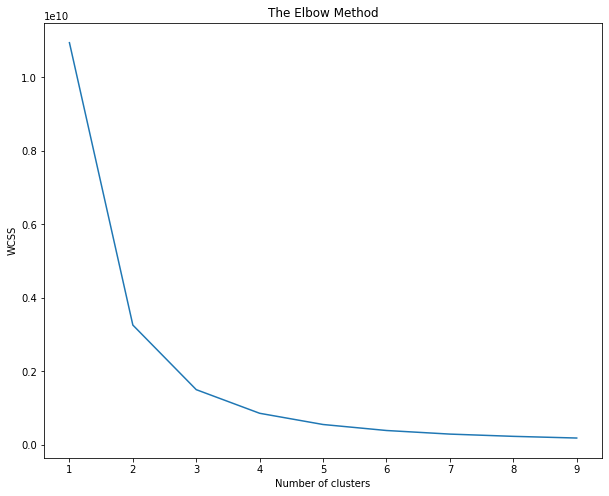

In [30]:
#optimum number of clusters using elbow curve
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 10):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(df2)
    
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)

kmeans.fit(df2)

KMeans(n_clusters=5, random_state=123)

In [32]:
identified_clusters = kmeans.fit_predict(df2)
identified_clusters

array([1, 1, 1, ..., 4, 4, 1], dtype=int32)

In [33]:
#to know value counts in array
import numpy as np


unique, counts = np.unique(identified_clusters, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   0 5139]
 [   1 8453]
 [   2 7360]
 [   3 1978]
 [   4 6227]]


In [34]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import davies_bouldin_score

In [35]:
labels = kmeans.labels_
davies_bouldin_score(df2, labels)

0.5136684917535372

In [36]:
df2['Cluster'] = identified_clusters
df2['Cluster']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        1
1        1
2        1
3        1
4        1
        ..
47497    1
47499    0
47504    4
47505    4
47512    1
Name: Cluster, Length: 29157, dtype: int32

In [37]:
df2.head()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster
0,1.4,80.0,0.333,1009.0,0.0,0.251,1
1,1.4,80.0,0.325,1003.0,0.0,0.251,1
2,1.4,80.0,0.329,995.0,0.0,0.251,1
3,1.4,80.0,0.325,1004.0,0.0,0.251,1
4,1.4,80.0,0.329,1005.0,0.0,0.251,1


In [38]:
df2.tail()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster
47497,1.6,99.0,0.059,1029.0,50.0,0.047,1
47499,1.6,94.0,0.412,2054.0,32.0,0.063,0
47504,1.6,94.0,0.196,1185.0,38.0,0.173,4
47505,1.6,96.0,0.251,1325.0,45.0,0.149,4
47512,1.6,99.0,0.055,769.0,0.0,0.082,1


In [39]:
df2.describe()

,ENGINE_POWER,ENGINE_COOLANT_TEMP,ENGINE_LOAD,ENGINE_RPM,SPEED,THROTTLE_POS,Cluster
count,29157.000000,29157.000000,29157.000000,29157.000000,29157.000000,29157.000000,29157.000000
mean,1.584848,81.144013,0.401463,1562.177830,36.750557,0.183191,1.852557
std,0.192476,10.465038,0.210639,611.785329,29.541443,0.090149,1.376721
min,1.000000,22.000000,0.051000,438.000000,0.000000,0.008000,0.000000
25%,1.600000,77.000000,0.255000,1001.000000,12.000000,0.125000,1.000000
50%,1.600000,84.000000,0.384000,1553.000000,33.000000,0.180000,2.000000
75%,1.600000,87.000000,0.490000,1991.000000,54.000000,0.239000,3.000000
max,1.800000,104.000000,1.000000,3816.000000,143.000000,0.871000,4.000000


In [40]:
X = df2.copy().drop(["Cluster"],axis=1)#drop the alpha ticker and date
Y = df2["Cluster"]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=4)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20409, 6)
(20409,)
(8748, 6)
(8748,)


In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score,classification_report

model =  MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [44]:
model.fit(x_train,y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=(60,), random_state=1234)

In [45]:
sklearn_mlp_train_preds = model.predict(x_train)
sklearn_mlp_validation_preds = model.predict(x_test)


In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_train,sklearn_mlp_train_preds))
print(classification_report(y_test,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3570
           1       0.98      0.98      0.98      5893
           2       0.88      0.88      0.88      5211
           3       0.87      0.88      0.88      1362
           4       0.94      0.87      0.90      4373

    accuracy                           0.91     20409
   macro avg       0.90      0.90      0.90     20409
weighted avg       0.91      0.91      0.91     20409

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1569
           1       0.99      0.98      0.98      2560
           2       0.88      0.86      0.87      2149
           3       0.86      0.86      0.86       616
           4       0.94      0.88      0.91      1854

    accuracy                           0.91      8748
   macro avg       0.89      0.90      0.89      8748
weighted avg       0.91      0.91      0.91      8748



In [49]:
pickle.dump(model, open('model1.pkl','wb'))



model = pickle.load(open('model1.pkl','rb'))

print(model.predict([[1.6,94,0.059,995,60,0.049]]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[1]


In [54]:
from mlxtend.plotting import plot_learning_curves

([0.5607843137254902,
  0.6579269786816957,
  0.6940542306435805,
  0.644738453999755,
  0.7731281850254802,
  0.7505104124132299,
  0.8345933081338374,
  0.8202976664420898,
  0.8567073170731707,
  0.910480670292518],
 [0.5632144490169182,
  0.656721536351166,
  0.695016003657979,
  0.6571787837219936,
  0.7788065843621399,
  0.7520576131687243,
  0.836076817558299,
  0.8244170096021948,
  0.8575674439871971,
  0.9068358481938729])

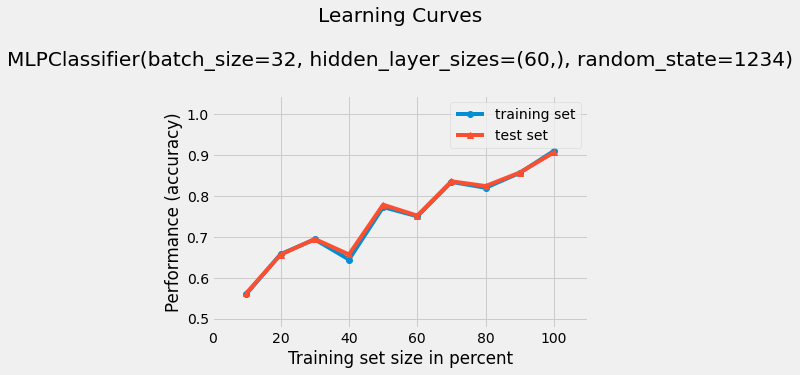

In [55]:
plot_learning_curves(x_train,y_train,x_test,y_test,model,scoring='accuracy')